most of the content taken from https://www.udemy.com/course/time-series-analysis-in-python/


# Imports

In [13]:
from IPython.display import YouTubeVideo
import pandas as pd
import scipy.stats
import pylab
import numpy as np
import matplotlib.pyplot as plt 
import statsmodels.graphics.tsaplots as sgt 
import statsmodels.tsa.stattools as sts 
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.graphics.tsaplots as sgt
from statsmodels.tsa.arima_model import ARMA
from scipy.stats.distributions import chi2
import statsmodels.tsa.stattools as sts 
import seaborn as sns
sns.set()
from pytablewriter import MarkdownTableWriter
import requests
import io

In [2]:
#video link variables
video_likelihood=YouTubeVideo('XepXtl9YKwc')

# Concepts

## likelihood &AIC-BIC

**likelihood function $\mathcal {L}$**

Maximum lkelihood estimation is a method that determines values for the parameters of a model. The parameter values are 
found such that they maximise the likelihood that the process described by the model produced the data that were actually observed.

Maximum likelihood estimation is a method that will find the values of μ and σ that result in the curve that best fits the data.

https://towardsdatascience.com/probability-concepts-explained-maximum-likelihood-estimation-c7b4342fdbb1

C:\Users\DELL\OneDrive\Documents\Data science\udemy\Time Series Analysis in Python\References\Maximum_likeyhood_explanatin.pdf



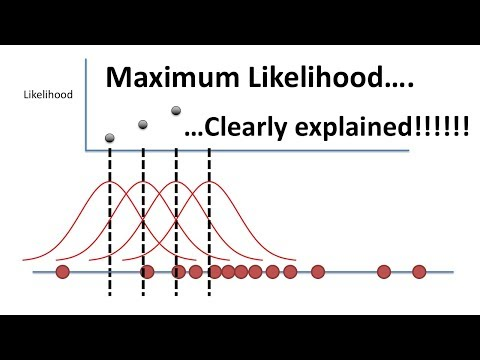

In [6]:
display(video_likelihood)



**What is AIC ? BIC?**

So the "IC"s are information criterion. They measure how much information the model needs, in order to 
estimate the coefficient values. 
Here are the formulas for the two and what each term 

***AIC:Akaike’s Information Criteria***

AIC is founded on information theory. When a statistical model is used to represent the process that generated the data, the representation will almost never be exact; so some information will be lost by using the model to represent the process. AIC estimates the relative amount of information lost by a given model: the less information a model loses, the higher the quality of that model.

In estimating the amount of information lost by a model, AIC deals with the trade-off between the goodness of fit of the model and the simplicity of the model. In other words, AIC deals with both the risk of overfitting and the risk of underfitting.

Let k be the number of estimated parameters in the model. Let $\hat L$ be the maximum value of the likelihood function for the model. Then the AIC value of the model is the following

$\mathrm {AIC} \,=\,2k-2\ln({\hat {L}})$

BIC:Bayesian Information 

In statistics, the Bayesian information criterion (BIC) or Schwarz information criterion (also SIC, SBC, SBIC) is a criterion for model selection among a finite set of models;
 models with lower BIC are generally preferred. It is based, in part, on the likelihood function and it is closely related to the Akaike information criterion (AIC).


 The BIC is formally defined as

$\mathrm {BIC} =k\ln(n)-2\ln({\widehat {L}}).\ $

## Timeseries
Time series is a sequence of information which attaches a time period to each value.

let X be timeseries variable to denote the value at a period t we use the notation X<sub>t</sub>

simillarly to get the previous period we use the notation X<sub>t-1</sub>

* Adjust the freqeuncy:Havign daily data but need to compute on Monthyly and vice versa

* Missing values :

* Order is important:you cannnot use train test spllit 

* Doesnot follow any standard Distriubtions



### QQplot

The quanti quintile Plott or Cucu Plott for short is a tool used in analytics to determine whether a
data set is distributed a certain way.

Unless specified otherwise, the Cucu plot showcases how the data fits a normal distribution.

* X-axis:
         The X axis represents the theoretical quintiles of the data set.Another explanation for the latter is how many standard deviations away from the mean these values are.
* Y-axis:the price with the highest ones at the top and the lowest at the bottom.
* redline :The red diagonal line on the screen represents what the data points should follow if they are normally

In [3]:
df_cmp=pd.read_excel(r"Index2018.xlsx")

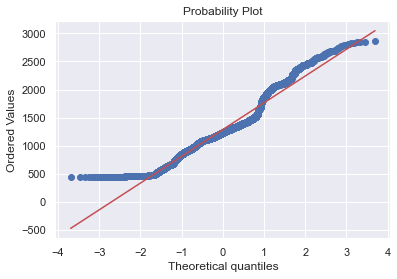

In [4]:
scipy.stats.probplot(df_cmp.spx,plot=pylab,)
pylab.show()
                    

### Handling timeseries data

#### Setting the Frequency

In [13]:
df_cmp['date']=pd.to_datetime(df_cmp['date'],dayfirst=True)

In [15]:
df_cmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6269 entries, 0 to 6268
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    6269 non-null   datetime64[ns]
 1   spx     6269 non-null   float64       
 2   dax     6269 non-null   float64       
 3   ftse    6269 non-null   float64       
 4   nikkei  6269 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 245.0 KB


In [16]:
df_cmp['date'].describe()

count                    6269
unique                   6269
top       1999-08-23 00:00:00
freq                        1
first     1994-01-07 00:00:00
last      2018-01-29 00:00:00
Name: date, dtype: object

In [18]:
df_cmp.set_index('date',inplace=True)

the data available on business days & if we try to set the freq as 'daily' then it generates new records
- df_cmp.asfreq('d')
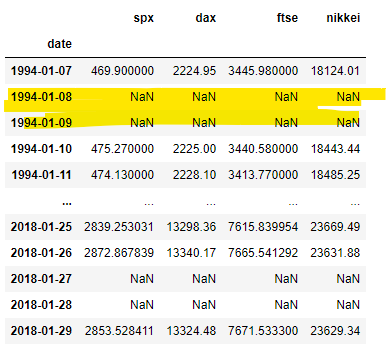
therefore we should not set the frequency 'daily' and do it on businessdays with 'b' parameter

In [22]:

df_cmp=df_cmp.asfreq('b')

#### Filling the missing values

In [23]:
df_cmp.isna().sum()

spx       8
dax       8
ftse      8
nikkei    8
dtype: int64

Different filling methods
- Forword filling 
- Backward filling
- average of dataset
- etc..

In [26]:
df_cmp['spx']=df_cmp['spx'].fillna(method="ffill")
df_cmp['ftse']=df_cmp['ftse'].fillna(method="ffill")

In [29]:
df_cmp.isna().sum()

spx       0
dax       0
ftse      0
nikkei    8
dtype: int64

In [28]:
df_cmp.dax=df_cmp.dax.fillna(value=df_cmp.dax.mean)

In [30]:
df_cmp.nikkei=df_cmp.nikkei.fillna(0)

In [33]:
### removing unnecessary columns 
del df_cmp['dax'],df_cmp['ftse'],df_cmp['nikkei']

In [35]:
df_cmp.rename(columns={'spx':'market_value'},inplace=True)

In [36]:
df_cmp

,market_value
date,
1994-01-07,469.900000
1994-01-10,475.270000
1994-01-11,474.130000
1994-01-12,474.170000
1994-01-13,472.470000
...,...
2018-01-23,2839.130362
2018-01-24,2837.544008
2018-01-25,2839.253031


#### Splitting the data

In [47]:
#lets keep 80% records as train set and remaining in test set
train_size=int(len(df_cmp)*0.8)

In [45]:
df_cmp_train=df_cmp.iloc[:train_size]

In [46]:
df_cmp_test=df_cmp.iloc[train_size:]

### working with Timeseries

#### Whitenoise 


White Noise is a special type of time series where the data doesn't follow a pattern.

In this case, since no pattern can be found, we can't predict white noise additionally, in order

to consider a series as white noise.

It needs to satisfy the following three conditions by having 

- a constant mean $\mu$, 
- a constant variance $\sigma$<sup>2</sup> and
- no autocorrelation in any period.

Let's start by generating the White Noise series and storing the values in a variable called W.M.,

In [52]:
wn=np.random.normal(loc=df_cmp_train.market_value.mean(),scale=df_cmp_train.market_value.std(),size=len(df_cmp_train))

In [54]:
df_cmp_train['wn']=wn


<ipython-input-54-5b03f16de9b3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cmp_train['wn']=wn


In [56]:
df_cmp_train.describe()

,market_value,wn
count,5021.000000,5021.000000
mean,1091.651926,1093.845188
std,292.559287,294.105202
min,438.920000,-35.863624
25%,914.620000,891.547763
50%,1144.650000,1088.009770
75%,1316.280729,1297.552446
max,1570.252238,2187.648492


lets check the constaint mean & variance ..To do this lets split the df into three parts and see whats their 
mean and variance

In [66]:
split_3=int(len(df_cmp_train)/3)

In [80]:
df_mean_1,df_mean_2,df_mean_3=df_cmp_train.iloc[:split_3],df_cmp_train.iloc[split_3:split_3+split_3],df_cmp_train.iloc[split_3+split_3:]

In [81]:
print(f"mean& variance 1st timeseries mean={df_mean_1.wn.mean()}variance= {df_mean_1.wn.std()} len={df_mean_1.shape[0]}")
print(f"mean& variance 2nd timeseries mean={df_mean_2.wn.mean()}variance= {df_mean_2.wn.std()} len={df_mean_2.shape[0]}")
print(f"mean& variance 3rd timeseries mean={df_mean_3.wn.mean()}variance= {df_mean_3.wn.std()} len={df_mean_3.shape[0]}")

mean& variance 1st timeseries mean=1097.5225160329455variance= 289.48209960477743 len=1673
mean& variance 2nd timeseries mean=1087.3996775889057variance= 297.2660497899571 len=1673
mean& variance 3rd timeseries mean=1096.6100637012462variance= 295.57788980922845 len=1675


So from definition first two conditions are satisified which are constant mean and variance across timeseries

Lets take a look at how the whist noise looks on the plot

Text(0.5, 1.0, 'White noise')

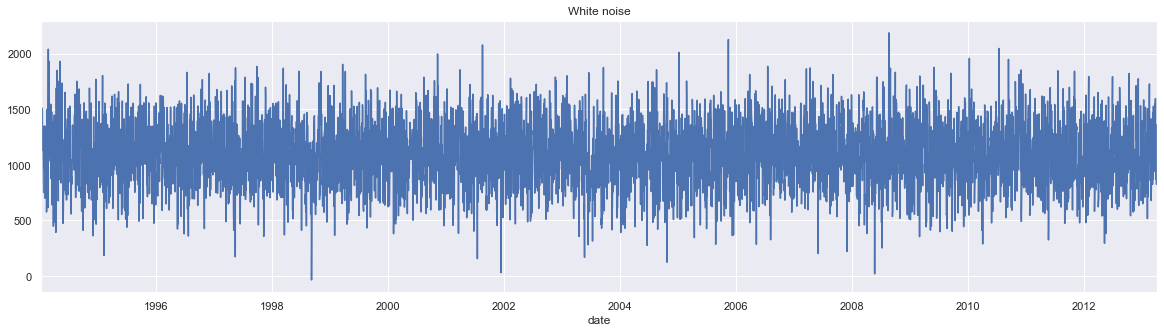

In [61]:
df_cmp_train['wn'].plot(figsize=(20,5))
plt.title('White noise')

(0.0, 2300.0)

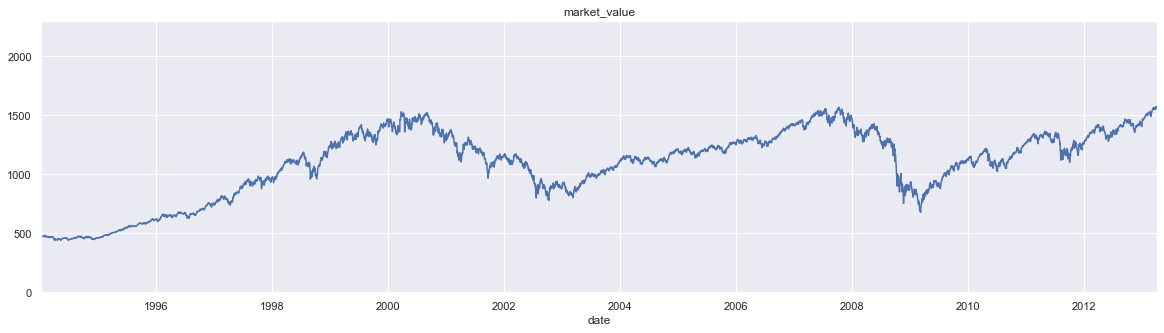

In [82]:
df_cmp_train['market_value'].plot(figsize=(20,5))
plt.title('market_value')
plt.ylim(0,2300)

#### Randomwalk

A random walk is a special type of time series where values tend to persist over time and the differences

between periods are simply white noise.

Lets P be the observed target variable and $\epsilon$<sub>t</sub> is a residula (whistenoise)then 

P<sub>t</sub> = P<sub>t-1</sub>+$\epsilon$<sub>t</sub>

P<sub>t-1</sub>=P<sub>t-2</sub>+$\epsilon$<sub>t-1</sub>

if we repeat until the last point in timeseries

P<sub>t</sub>=($\epsilon$<sub>t</sub>+$\epsilon$<sub>t-1</sub>+$\epsilon$<sub>t-2</sub>+....$\epsilon$<sub>t-n</sub>)*B*



In [5]:
rw = pd.read_csv(r"RandWalk.csv")
rw.date = pd.to_datetime(rw.date, dayfirst = True)
rw.set_index("date", inplace = True)
rw = rw.asfreq('b')

In [94]:
rw['price'].describe()

count    5021.000000
mean     1269.944293
std       444.216793
min       585.483034
25%       931.550429
50%      1156.363045
75%      1488.362029
max      2715.508720
Name: price, dtype: float64

In [88]:
df_cmp_train['rw'] = rw.price

<ipython-input-88-ce250015d45a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cmp_train['rw'] = rw.price


In [90]:
#Lets the check the mean of random walk
df_mean_1,df_mean_2,df_mean_3=df_cmp_train.iloc[:split_3],df_cmp_train.iloc[split_3:split_3+split_3],df_cmp_train.iloc[split_3+split_3:]

In [92]:
print(f"mean& variance 1st timeseries mean={df_mean_1.rw.mean()}variance= {df_mean_1.rw.std()} len={df_mean_1.shape[0]}")
print(f"mean& variance 2nd timeseries mean={df_mean_2.rw.mean()}variance= {df_mean_2.rw.std()} len={df_mean_2.shape[0]}")
print(f"mean& variance 3rd timeseries mean={df_mean_3.rw.mean()}variance= {df_mean_3.rw.std()} len={df_mean_3.shape[0]}")

mean& variance 1st timeseries mean=1003.7900464774663variance= 186.9690790993821 len=1673
mean& variance 2nd timeseries mean=1029.5446763526593variance= 208.9738580156697 len=1673
mean& variance 3rd timeseries mean=1775.893316721791variance= 358.50495109664024 len=1675


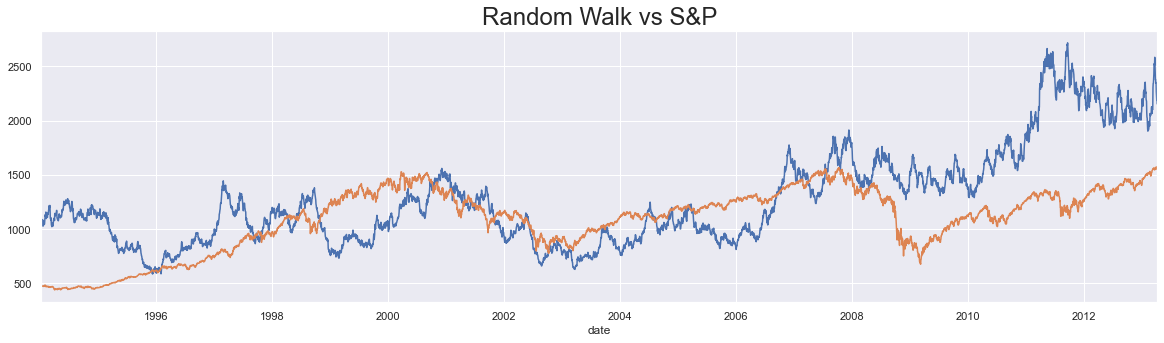

In [89]:
df_cmp_train.rw.plot(figsize = (20,5))
df_cmp_train.market_value.plot()
plt.title("Random Walk vs S&P", size = 24)
plt.show()

#### stationarity

time series stationary implies that taking consecutive samples of data with the same size should have

identical covariance regardless of the starting point.

- Constant mean

- Constant Variance

- consistent covariance between periods at an identical distance

Cov(x<sub>n</sub>,x<sub>n+k</sub>)= Cov(x<sub>m</sub>,x<sub>m+k</sub>)

In other words, we want to have the same covariance between the first and fourth period as we do for

the third and sixth since they are three intervals apart.

Cov(x<sub>1</sub>,x<sub>4</sub>)= Cov(x<sub>3</sub>,x<sub>6</sub>)



we run Dickie Fuller test to see if the timeseries is stationary or not

H<sub>0</sub>:$\phi$<1

H<sub>1</sub>:$\phi$=1

test statistic<Criticalvalue =>reject the hypothesis =>stationary

In [95]:
sts.adfuller(df_cmp_train.market_value)


(-1.7369847452352465,
 0.4121645696770607,
 18,
 5002,
 {'1%': -3.431658008603046,
  '5%': -2.862117998412982,
  '10%': -2.567077669247375},
 39904.880607487445)

In [104]:
print(
    f"test statistic < critical value={sts.adfuller(df_cmp_train.market_value)[0]<sts.adfuller(df_cmp_train.market_value)[4]['10%']}")

test statistic < critical value=False


| Value      | parameter |
| ----------- | ----------- |
| -1.7369847452352465     | Test statistic       |
| 0.4121645696770607   | P-value        |
|18                    |No.of lags used in the regression|
|5002|total noof observation|
|'1%': -3.431658008603046|1% critical value|
|39904.880607487445|Maximum liklyhood information critiera|

In [96]:
sts.adfuller(df_cmp_train.wn)

(-32.424377919084236,
 0.0,
 4,
 5016,
 {'1%': -3.431654355990492,
  '5%': -2.862116384706994,
  '10%': -2.5670768102089263},
 70848.09210354184)

In [105]:
print(
    f"test statistic < critical value={sts.adfuller(df_cmp_train.wn)[0]<sts.adfuller(df_cmp_train.wn)[4]['10%']}")

test statistic < critical value=True


#### Seasonality

Well, seasonality suggests that certain trends will appear on a cyclical basis.

One approach is to decompose the sequence where we split up the TIME series into three effects trend,

seasonal and residual.

Of course, the trend represents the pattern consistent throughout the data.

Seasonal expresses all cyclical effects due to seasonality.

Finally, the residuals are the error of prediction or the difference between the actual data and the

The simplest type of decomposition is called naïf with naïf decomposition.

We expect a linear relationship between the three parts and the observed Time series.

Now let's pay attention to the two main approaches to naïf decomposition additive or multiplicative.

- Additive assumes that for any time period, the observed value is the sum of the trend, seasonal and

residual for that period.

- Similarly, the multiplicative decomposition assumes the original series is a product of the trend,

seasonal and residual values.



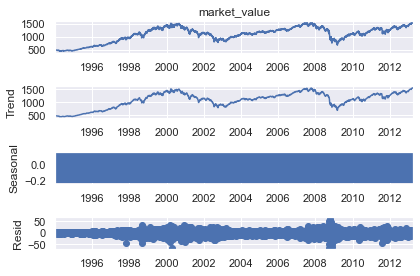

In [111]:
s_dec_additive = seasonal_decompose(df_cmp_train.market_value, model = "additive")
s_dec_additive.plot()
plt.show()

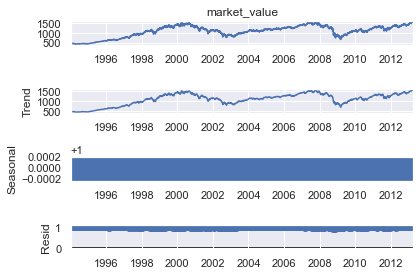

In [110]:
s_dec_multiplicative = seasonal_decompose(df_cmp_train.market_value, model = "multiplicative")
s_dec_multiplicative.plot()
plt.show()

#### Correlation between past and present values

#### Auto correlation function

X<sub>t-1</sub> ->X<sub>t</sub>

+

X<sub>t-2</sub> ->X<sub>t</sub>

+

X<sub>t-3</sub> ->X<sub>t</sub>

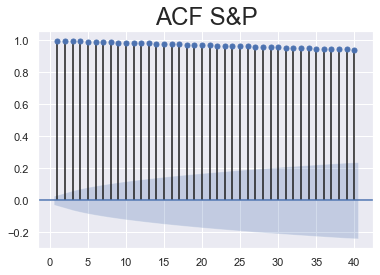

In [112]:
sgt.plot_acf(df_cmp_train.market_value, lags = 40, zero = False)
plt.title("ACF S&P", size = 24)
plt.show()

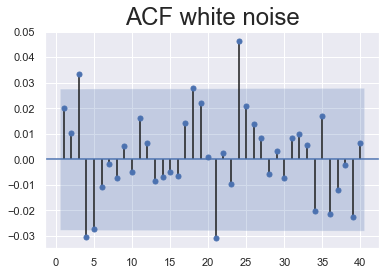

In [114]:
sgt.plot_acf(df_cmp_train.wn, lags = 40, zero = False)
plt.title("ACF white noise", size = 24)
plt.show()

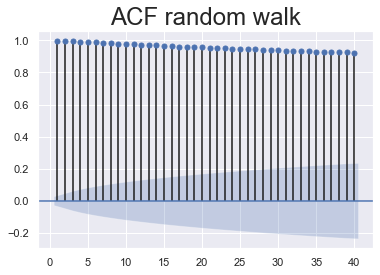

In [116]:
sgt.plot_acf(df_cmp_train.rw, lags = 40, zero = False)
plt.title("ACF random walk", size = 24)
plt.show()

#### Partial Auto Correlation function

PCF checks the correlation between a previous period and present period and cancels out the between correlations

X<sub>t-1</sub> ->X<sub>t</sub>


X<sub>t-2</sub> ->X<sub>t</sub>



X<sub>t-n</sub> ->X<sub>t</sub>

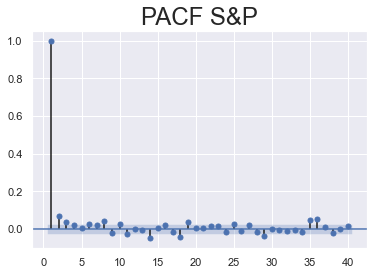

In [117]:
sgt.plot_pacf(df_cmp_train.market_value, lags = 40, zero = False, method = ('ols'))
plt.title("PACF S&P", size = 24)
plt.show()

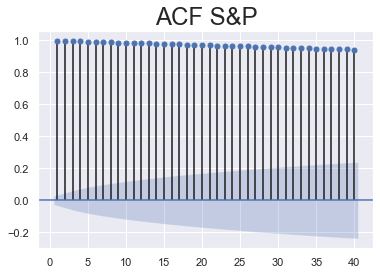

## Models

### AR model-Non Stationary data

It's a linear model where current period values are a sum of past outcomes multiplied by a numeric factor.

x<sub>t</sub>=C+$\phi$x<sub>t-1</sub>+$\epsilon$<sub>t</sub>

-1<=$\phi$<=1

why?

lets take $\phi$=1.3 adn c=0
then

x2=x1*1.3
x3=x2*1.3=x1*1.3*1.3
x4=x3*1.3=x1*1.3*1.3*1.3
for large time series this would be resulting very large values

A model with Two lags would like this

x<sub>t</sub>=c+$\phi$<sub>1</sub>x<sub>t-1</sub>+$\phi$<sub>2</sub>x<sub>t-2</sub>+$\epsilon$<sub>t</sub>

If we include more lags then the model gets complicated

In [6]:
raw_csv_data =pd.read_excel(r"Index2018.xlsx")
df_comp=raw_csv_data.copy()
df_comp.date = pd.to_datetime(df_comp.date, dayfirst = True)
df_comp.set_index("date", inplace=True)
df_comp=df_comp.asfreq('b')
df_comp=df_comp.fillna(method='ffill')
df_comp['market_value']=df_comp.ftse
del df_comp['spx']
del df_comp['dax']
del df_comp['ftse']
del df_comp['nikkei']
size = int(len(df_comp)*0.8)
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]

#### The ACF

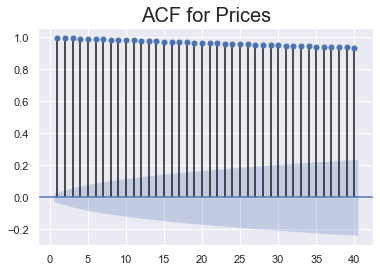

In [124]:
sgt.plot_acf(df.market_value, zero = False, lags = 40)
plt.title("ACF for Prices", size = 20)
plt.show()

#### The PACF

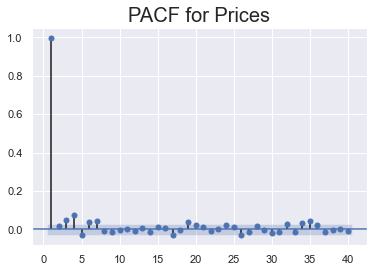

In [125]:
sgt.plot_pacf(df.market_value, lags = 40, alpha = 0.05, zero = False, method = ('ols'))
plt.title("PACF for Prices", size = 20)
plt.show()

In [128]:
model_ar = ARMA(df.market_value, order=(1,0))

In [129]:
results_ar = model_ar.fit()

In [130]:
results_ar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(1, 0)   Log Likelihood              -27622.598
Method:                       css-mle   S.D. of innovations             59.258
Date:                Mon, 21 Feb 2022   AIC                          55251.195
Time:                        23:37:48   BIC                          55270.759
Sample:                    01-07-1994   HQIC                         55258.051
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5031.8523    487.610     10.319      0.000    4076.154    5987.551
ar.L1.market_value     0.9985      0.001   1298.321      0.000       0.997       1.000
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0015           +0.0000j            1.0015            0.0000
-----------------------------------------------------------------------------
"""

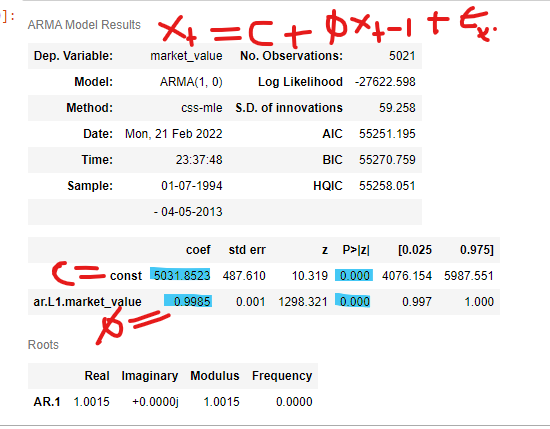

#### Higher-Lag AR Models

In [132]:
model_ar_2 = ARMA(df.market_value, order=(2,0))
results_ar_2 = model_ar_2.fit()
results_ar_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(2, 0)   Log Likelihood              -27621.868
Method:                       css-mle   S.D. of innovations             59.249
Date:                Mon, 21 Feb 2022   AIC                          55251.737
Time:                        23:41:45   BIC                          55277.822
Sample:                    01-07-1994   HQIC                         55260.877
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5070.5735    487.501     10.401      0.000    4115.088    6026.058
ar.L1.market_value     0.9816      0.014     69.602      0.000       0.954       1.009
ar.L2.market_value     0.0169      0.014      1.198      0.231      -0.011       0.045
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0015           +0.0000j            1.0015            0.0000
AR.2          -59.0593           +0.0000j           59.0593            0.5000
-----------------------------------------------------------------------------
"""

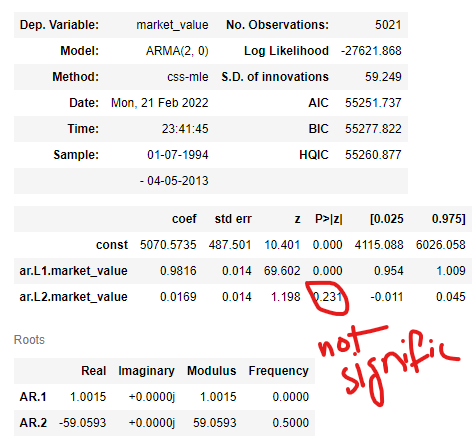

In [133]:
model_ar_3 = ARMA(df.market_value, order=(3,0))
results_ar_3 = model_ar_3.fit()
results_ar_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(3, 0)   Log Likelihood              -27615.871
Method:                       css-mle   S.D. of innovations             59.178
Date:                Mon, 21 Feb 2022   AIC                          55241.742
Time:                        23:47:25   BIC                          55274.349
Sample:                    01-07-1994   HQIC                         55253.168
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5089.6413    520.352      9.781      0.000    4069.770    6109.512
ar.L1.market_value     0.9806      0.014     69.619      0.000       0.953       1.008
ar.L2.market_value    -0.0309      0.020     -1.563      0.118      -0.070       0.008
ar.L3.market_value     0.0489      0.014      3.466      0.001       0.021       0.077
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0013           -0.0000j            1.0013           -0.0000
AR.2           -0.1850           -4.5161j            4.5199           -0.2565
AR.3           -0.1850           +4.5161j            4.5199            0.2565
-----------------------------------------------------------------------------
"""

In [134]:
model_ar_4 = ARMA(df.market_value, order=[4,0])
results_ar_4 = model_ar_4.fit()
results_ar_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(4, 0)   Log Likelihood              -27602.565
Method:                       css-mle   S.D. of innovations             59.022
Date:                Mon, 21 Feb 2022   AIC                          55217.130
Time:                        23:47:32   BIC                          55256.258
Sample:                    01-07-1994   HQIC                         55230.841
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5089.6411    559.967      9.089      0.000    3992.125    6187.157
ar.L1.market_value     0.9770      0.014     69.492      0.000       0.949       1.005
ar.L2.market_value    -0.0286      0.020     -1.455      0.146      -0.067       0.010
ar.L3.market_value    -0.0224      0.020     -1.135      0.256      -0.061       0.016
ar.L4.market_value     0.0728      0.014      5.166      0.000       0.045       0.100
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0011           -0.0000j            1.0011           -0.0000
AR.2            0.9550           -2.0884j            2.2964           -0.1817
AR.3            0.9550           +2.0884j            2.2964            0.1817
AR.4           -2.6036           -0.0000j            2.6036           -0.5000
-----------------------------------------------------------------------------
"""

#### LLR test

In [211]:
#DF =number of parameters difference between firstparameter and second parameter
def LLR_test(mod_1, mod_2, DF=1):
    L1 = mod_1.fit().llf
    L2 = mod_2.fit().llf
    LR = (2*(L2-L1))
    p = chi2.sf(LR, DF).round(3)
    return p

In [137]:
LLR_test(model_ar_2,model_ar_3)
##0.001 whichc suggests AR(3) better than AR(2)

0.001

In [139]:
LLR_test(model_ar_3,model_ar_4)
##0.001 whichc suggests AR(4) better than AR(3)

0.0

In [140]:
model_ar_7 = ARMA(df.market_value, order=[7,0])
results_ar_7 = model_ar_7.fit()
results_ar_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(7, 0)   Log Likelihood              -27591.900
Method:                       css-mle   S.D. of innovations             58.896
Date:                Mon, 21 Feb 2022   AIC                          55201.799
Time:                        23:51:08   BIC                          55260.492
Sample:                    01-07-1994   HQIC                         55222.366
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5089.6414    589.583      8.633      0.000    3934.080    6245.202
ar.L1.market_value     0.9786      0.014     69.518      0.000       0.951       1.006
ar.L2.market_value    -0.0304      0.020     -1.540      0.124      -0.069       0.008
ar.L3.market_value    -0.0267      0.020     -1.353      0.176      -0.065       0.012
ar.L4.market_value     0.1038      0.020      5.279      0.000       0.065       0.142
ar.L5.market_value    -0.0668      0.020     -3.385      0.001      -0.105      -0.028
ar.L6.market_value    -0.0025      0.020     -0.127      0.899      -0.041       0.036
ar.L7.market_value     0.0427      0.014      3.026      0.002       0.015       0.070
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0010           -0.0000j            1.0010           -0.0000
AR.2            1.3301           -0.9296j            1.6228           -0.0971
AR.3            1.3301           +0.9296j            1.6228            0.0971
AR.4           -0.0400           -1.5870j            1.5875           -0.2540
AR.5           -0.0400           +1.5870j            1.5875            0.2540
AR.6           -1.7611           -0.6517j            1.8779           -0.4436
AR.7           -1.7611           +0.6517j            1.8779            0.4436
-----------------------------------------------------------------------------
"""

In [141]:
model_ar_8 = ARMA(df.market_value, order=[8,0])
results_ar_8 = model_ar_8.fit()
results_ar_8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(8, 0)   Log Likelihood              -27591.739
Method:                       css-mle   S.D. of innovations             58.894
Date:                Mon, 21 Feb 2022   AIC                          55203.478
Time:                        23:51:30   BIC                          55268.692
Sample:                    01-07-1994   HQIC                         55226.329
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5089.6415    584.989      8.700      0.000    3943.083    6236.200
ar.L1.market_value     0.9790      0.014     69.476      0.000       0.951       1.007
ar.L2.market_value    -0.0304      0.020     -1.541      0.123      -0.069       0.008
ar.L3.market_value    -0.0272      0.020     -1.379      0.168      -0.066       0.011
ar.L4.market_value     0.1047      0.020      5.306      0.000       0.066       0.143
ar.L5.market_value    -0.0670      0.020     -3.396      0.001      -0.106      -0.028
ar.L6.market_value    -0.0028      0.020     -0.139      0.889      -0.041       0.036
ar.L7.market_value     0.0505      0.020      2.559      0.010       0.012       0.089
ar.L8.market_value    -0.0080      0.014     -0.567      0.571      -0.036       0.020
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0010           -0.0000j            1.0010           -0.0000
AR.2           -1.6223           -0.6323j            1.7412           -0.4409
AR.3           -1.6223           +0.6323j            1.7412            0.4409
AR.4           -0.0911           -1.5626j            1.5653           -0.2593
AR.5           -0.0911           +1.5626j            1.5653            0.2593
AR.6            1.3256           -1.0019j            1.6616           -0.1030
AR.7            1.3256           +1.0019j            1.6616            0.1030
AR.8            6.0863           -0.0000j            6.0863           -0.0000
-----------------------------------------------------------------------------
"""

In [144]:
LLR_test(model_ar_7,model_ar_8)
#AR(8) not better than AR(7)

0.571

In [146]:
LLR_test(model_ar,model_ar_7,DF=6)
#AR(7) better than AR(1)

0.0

### AR model-Stationary data

In [7]:
raw_csv_data = pd.read_excel(r"Index2018.xlsx")
df_comp=raw_csv_data.copy()
df_comp.date = pd.to_datetime(df_comp.date, dayfirst = True)
df_comp.set_index("date", inplace=True)
df_comp=df_comp.asfreq('b')
df_comp=df_comp.fillna(method='ffill')
df_comp['market_value']=df_comp.ftse

In [8]:
del df_comp['spx']
del df_comp['dax']
del df_comp['ftse']
del df_comp['nikkei']
size = int(len(df_comp)*0.8)
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]

In [9]:
df['returns'] = df.market_value.pct_change(1).mul(100)
#since we are computing the difference between current and previosu value ,first occurence will not have any value to compare 
#therefore skipping the first record
df = df.iloc[1:]

<ipython-input-9-9fbd1b7d2513>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['returns'] = df.market_value.pct_change(1).mul(100)


In [10]:
print(
    f"test statistic < critical value={sts.adfuller(df.returns)[0]<sts.adfuller(df.returns)[4]['10%']}")

test statistic < critical value=True


In [11]:
def adfuller_test(series):
    writer = MarkdownTableWriter(
        table_name="adfuller-output",
        headers=["parameter", "value"],
        value_matrix=[
            ["Test statistic", sts.adfuller(series)[0]],
            ["P-value", sts.adfuller(series)[1]],
            ["No.of lags used in the regression", sts.adfuller(series)[2]],
            ["total noof observation", sts.adfuller(series)[3]],
            ["1% critical value", sts.adfuller(series)[4]['1%']],
            ["5% critical value", sts.adfuller(series)[4]['5%']],
            ["Maximum likelihood", sts.adfuller(series)[5]],
        ],
    )
    return writer
# writer.write_table()

In [12]:
adfuller_test(df.returns)

parameter,value
Test statistic,-12.7702657194972200000
P-value,0.0000000000000000000
No.of lags used in the regression,32.0000000000000000000
total noof observation,4987.0000000000000000000
1% critical value,-3.4316619448857790000
5% critical value,-2.8621197374408225000
Maximum likelihood,15696.7672456975010000000


P-value is zero and Test statistic < Critical value therefore the timeseries is stationary

#### ACF

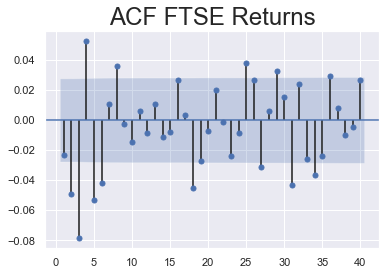

In [169]:
sgt.plot_acf(df.returns, lags=40, zero = False)
plt.title("ACF FTSE Returns", size=24)
plt.show()

#### PACF

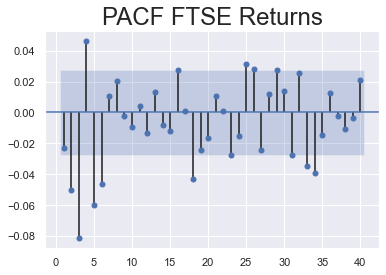

In [170]:
sgt.plot_pacf(df.returns, lags = 40, zero = False, method = ('ols'))
plt.title("PACF FTSE Returns", size=24)
plt.show()

#### AR(1)

In [171]:
model_ret_ar_1 = ARMA(df.returns, order = (1,0))

In [172]:
results_ret_ar_1 = model_ret_ar_1.fit()

In [174]:
#coefficients are not significant
results_ret_ar_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(1, 0)   Log Likelihood               -7929.749
Method:                       css-mle   S.D. of innovations              1.174
Date:                Wed, 23 Feb 2022   AIC                          15865.497
Time:                        21:41:21   BIC                          15885.061
Sample:                    01-10-1994   HQIC                         15872.353
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0188      0.016      1.159      0.247      -0.013       0.051
ar.L1.returns    -0.0230      0.014     -1.631      0.103      -0.051       0.005
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1          -43.4387           +0.0000j           43.4387            0.5000
-----------------------------------------------------------------------------
"""

#### AR(2)

In [175]:
model_ret_ar_2 = ARMA(df.returns, order = (2,0))
results_ret_ar_2 = model_ret_ar_2.fit()
results_ret_ar_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(2, 0)   Log Likelihood               -7923.456
Method:                       css-mle   S.D. of innovations              1.173
Date:                Wed, 23 Feb 2022   AIC                          15854.911
Time:                        21:42:04   BIC                          15880.996
Sample:                    01-10-1994   HQIC                         15864.052
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0188      0.015      1.220      0.222      -0.011       0.049
ar.L1.returns    -0.0242      0.014     -1.716      0.086      -0.052       0.003
ar.L2.returns    -0.0500      0.014     -3.550      0.000      -0.078      -0.022
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.2417           -4.4635j            4.4701           -0.2586
AR.2           -0.2417           +4.4635j            4.4701            0.2586
-----------------------------------------------------------------------------
"""

In [176]:
LLR_test(model_ret_ar_1, model_ret_ar_2)

0.0

In [177]:
model_ret_ar_3 = ARMA(df.returns, order = (3,0))
results_ret_ar_3 = model_ret_ar_3.fit()
results_ret_ar_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(3, 0)   Log Likelihood               -7906.738
Method:                       css-mle   S.D. of innovations              1.169
Date:                Wed, 23 Feb 2022   AIC                          15823.477
Time:                        21:42:24   BIC                          15856.083
Sample:                    01-10-1994   HQIC                         15834.902
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.014      1.330      0.184      -0.009       0.047
ar.L1.returns    -0.0283      0.014     -2.011      0.044      -0.056      -0.001
ar.L2.returns    -0.0521      0.014     -3.705      0.000      -0.080      -0.025
ar.L3.returns    -0.0815      0.014     -5.792      0.000      -0.109      -0.054
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.9233           -2.0210j            2.2219           -0.1818
AR.2            0.9233           +2.0210j            2.2219            0.1818
AR.3           -2.4855           -0.0000j            2.4855           -0.5000
-----------------------------------------------------------------------------
"""

In [178]:
LLR_test(model_ret_ar_2, model_ret_ar_3)

0.0

In [179]:
model_ret_ar_4 = ARMA(df.returns, order = (4,0))
results_ret_ar_4 = model_ret_ar_4.fit()
print(results_ret_ar_4.summary())
print ("LLR test: " + str(LLR_test(model_ret_ar_3, model_ret_ar_4)))

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(4, 0)   Log Likelihood               -7901.330
Method:                       css-mle   S.D. of innovations              1.168
Date:                Wed, 23 Feb 2022   AIC                          15814.661
Time:                        21:42:43   BIC                          15853.788
Sample:                    01-10-1994   HQIC                         15828.371
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0188      0.015      1.267      0.205      -0.010       0.048
ar.L1.returns    -0.0245      0.014     -1.739      0.082      -0.052       0.003
ar.L2.returns    -0.0496      0.014     

In [181]:
model_ret_ar_6 = ARMA(df.returns, order = (6,0))
results_ret_ar_6 = model_ret_ar_6.fit()
print(results_ret_ar_6.summary())
print ("LLR test: " + str(LLR_test(model_ret_ar_4, model_ret_ar_6)))

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(6, 0)   Log Likelihood               -7886.945
Method:                       css-mle   S.D. of innovations              1.164
Date:                Wed, 23 Feb 2022   AIC                          15789.890
Time:                        21:43:23   BIC                          15842.059
Sample:                    01-10-1994   HQIC                         15808.170
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.013      1.414      0.157      -0.007       0.045
ar.L1.returns    -0.0245      0.014     -1.740      0.082      -0.052       0.003
ar.L2.returns    -0.0523      0.014     

### AR Model:Residuals

In [184]:
df['resid']=results_ar_7.resid

In [193]:
adfuller_test(df['resid'])

parameter,value
Test statistic,-70.8171240413767900
P-value,0.0000000000000000
No.of lags used in the regression,0.0000000000000000
total noof observation,5019.0000000000000000
1% critical value,-3.4316535759402753
5% critical value,-2.8621160400844468
Maximum likelihood,54832.4197086167700000


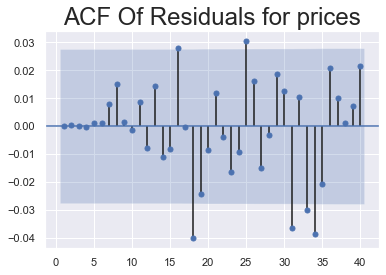

In [185]:
sgt.plot_acf(df.resid, zero = False, lags = 40)
plt.title("ACF Of Residuals for prices",size=24)
plt.show()

Residual is stationary and ACF plot confirms all the coefficeints are below the significant area therefore it confirms
out model is doing good.

Lets also do the residual analysis for lower AR model

In [195]:
df['resid1']=results_ar.resid

In [196]:
adfuller_test(df['resid1'])

parameter,value
Test statistic,-32.1667363185149700
P-value,0.0000000000000000
No.of lags used in the regression,5.0000000000000000
total noof observation,5014.0000000000000000
1% critical value,-3.4316548765428174
5% critical value,-2.8621166146845334
Maximum likelihood,54842.2342117974000000


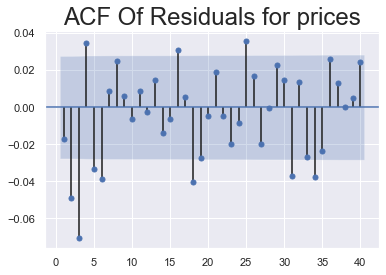

In [197]:
sgt.plot_acf(df.resid1, zero = False, lags = 40)
plt.title("ACF Of Residuals for prices",size=24)
plt.show()

Timeseries is stationary and ACF plot shows there significant correlations ,hence AR(1) model does not explain the whole data

In [202]:
df['res_ret'] = results_ret_ar_6.resid
adfuller_test(df['res_ret'])



parameter,value
Test statistic,-70.7838017105532900
P-value,0.0000000000000000
No.of lags used in the regression,0.0000000000000000
total noof observation,5019.0000000000000000
1% critical value,-3.4316535759402753
5% critical value,-2.8621160400844468
Maximum likelihood,15692.5708345550120000


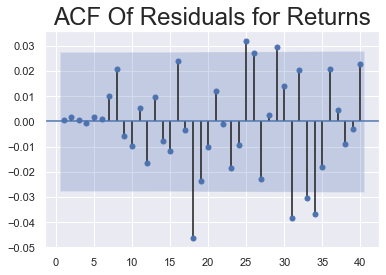

In [201]:

sgt.plot_acf(df.res_ret, zero = False, lags = 40)
plt.title("ACF Of Residuals for Returns",size=24)
plt.show()

In [205]:
df['res_ret_2'] = results_ret_ar_2.resid
adfuller_test(df['res_ret_2'])

parameter,value
Test statistic,-12.7829478987602860000
P-value,0.0000000000000000000
No.of lags used in the regression,32.0000000000000000000
total noof observation,4987.0000000000000000000
1% critical value,-3.4316619448857790000
5% critical value,-2.8621197374408225000
Maximum likelihood,15696.6933449282600000000


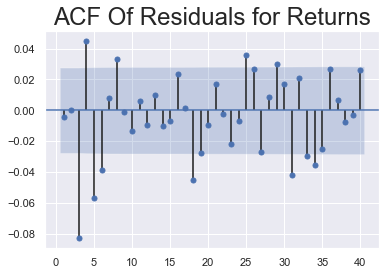

In [206]:
sgt.plot_acf(df.res_ret_2, zero = False, lags = 40)
plt.title("ACF Of Residuals for Returns",size=24)
plt.show()

## MA model-Non Stationary data

In [ ]:
### definition difference AR vs MA


#### MA(1)

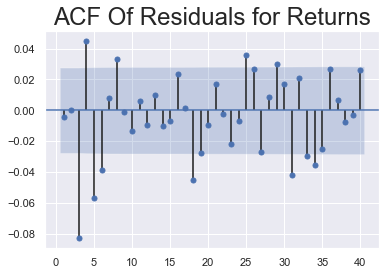

In [207]:
sgt.plot_acf(df.res_ret_2, zero = False, lags = 40)
plt.title("ACF Of Residuals for Returns",size=24)
plt.show()

In [208]:
model_ret_ma_1 = ARMA(df.returns[1:], order=(0,1))
results_ret_ma_1 = model_ret_ma_1.fit()
results_ret_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5019
Model:                     ARMA(0, 1)   Log Likelihood               -7928.501
Method:                       css-mle   S.D. of innovations              1.174
Date:                Thu, 24 Feb 2022   AIC                          15863.003
Time:                        22:25:45   BIC                          15882.566
Sample:                    01-11-1994   HQIC                         15869.858
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0188      0.016      1.165      0.244      -0.013       0.050
ma.L1.returns    -0.0258      0.015     -1.721      0.085      -0.055       0.004
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           38.8132           +0.0000j           38.8132            0.0000
-----------------------------------------------------------------------------
"""

#### Higher-Lag MA Models for Returns

In [209]:
model_ret_ma_2 = ARMA(df.returns[1:], order=(0,2))
results_ret_ma_2 = model_ret_ma_2.fit()
print(results_ret_ma_2.summary())
print("\nLLR test p-value = " + str(LLR_test(model_ret_ma_1, model_ret_ma_2)))

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5019
Model:                     ARMA(0, 2)   Log Likelihood               -7921.760
Method:                       css-mle   S.D. of innovations              1.173
Date:                Thu, 24 Feb 2022   AIC                          15851.521
Time:                        22:27:05   BIC                          15877.605
Sample:                    01-11-1994   HQIC                         15860.661
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.015      1.242      0.214      -0.011       0.049
ma.L1.returns    -0.0327      0.014     -2.300      0.021      -0.061      -0.005
ma.L2.returns    -0.0502      0.014     

In [210]:
model_ret_ma_3 = ARMA(df.returns[1:], order=(0,3))
results_ret_ma_3 = model_ret_ma_3.fit()
print(results_ret_ma_3.summary())
print("\nLLR test p-value = " + str(LLR_test(model_ret_ma_2, model_ret_ma_3)))

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5019
Model:                     ARMA(0, 3)   Log Likelihood               -7903.214
Method:                       css-mle   S.D. of innovations              1.168
Date:                Thu, 24 Feb 2022   AIC                          15816.429
Time:                        22:27:37   BIC                          15849.034
Sample:                    01-11-1994   HQIC                         15827.854
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0190      0.014      1.379      0.168      -0.008       0.046
ma.L1.returns    -0.0203      0.014     -1.425      0.154      -0.048       0.008
ma.L2.returns    -0.0557      0.013     

In [212]:
model_ret_ma_4 = ARMA(df.returns[1:], order=[0,4])
results_ret_ma_4 = model_ret_ma_4.fit()
print(results_ret_ma_4.summary())
print("\nLLR test p-value = " + str(LLR_test(model_ret_ma_3, model_ret_ma_4)))

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5019
Model:                     ARMA(0, 4)   Log Likelihood               -7897.656
Method:                       css-mle   S.D. of innovations              1.167
Date:                Thu, 24 Feb 2022   AIC                          15807.312
Time:                        22:28:49   BIC                          15846.438
Sample:                    01-11-1994   HQIC                         15821.022
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.014      1.309      0.190      -0.009       0.047
ma.L1.returns    -0.0203      0.014     -1.445      0.149      -0.048       0.007
ma.L2.returns    -0.0551      0.014     

In [213]:
model_ret_ma_5 = ARMA(df.returns[1:], order=[0,5])
results_ret_ma_5 = model_ret_ma_5.fit()
print(results_ret_ma_5.summary())
print("\nLLR test p-value = " + str(LLR_test(model_ret_ma_4, model_ret_ma_5)))

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5019
Model:                     ARMA(0, 5)   Log Likelihood               -7891.710
Method:                       css-mle   S.D. of innovations              1.166
Date:                Thu, 24 Feb 2022   AIC                          15797.421
Time:                        22:29:01   BIC                          15843.068
Sample:                    01-11-1994   HQIC                         15813.416
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0190      0.014      1.380      0.168      -0.008       0.046
ma.L1.returns    -0.0262      0.014     -1.853      0.064      -0.054       0.002
ma.L2.returns    -0.0498      0.014     

In [214]:
model_ret_ma_6 = ARMA(df.returns[1:], order=[0,6])
results_ret_ma_6 = model_ret_ma_6.fit()
print(results_ret_ma_6.summary())
print("\nLLR test p-value = " + str(LLR_test(model_ret_ma_5, model_ret_ma_6)))

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5019
Model:                     ARMA(0, 6)   Log Likelihood               -7888.117
Method:                       css-mle   S.D. of innovations              1.165
Date:                Thu, 24 Feb 2022   AIC                          15792.234
Time:                        22:29:11   BIC                          15844.402
Sample:                    01-11-1994   HQIC                         15810.515
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0190      0.013      1.433      0.152      -0.007       0.045
ma.L1.returns    -0.0237      0.014     -1.683      0.092      -0.051       0.004
ma.L2.returns    -0.0486      0.014     

In [216]:
model_ret_ma_8 = ARMA(df.returns[1:], order=[0,8])
results_ret_ma_8 = model_ret_ma_8.fit()
print(results_ret_ma_8.summary())
#print("\nLLR test p-value = " + str(LLR_test(model_ret_ma_6, model_ret_ma_8)))

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5019
Model:                     ARMA(0, 8)   Log Likelihood               -7884.499
Method:                       css-mle   S.D. of innovations              1.164
Date:                Thu, 24 Feb 2022   AIC                          15788.999
Time:                        22:29:53   BIC                          15854.208
Sample:                    01-11-1994   HQIC                         15811.849
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0190      0.014      1.367      0.172      -0.008       0.046
ma.L1.returns    -0.0238      0.014     -1.690      0.091      -0.051       0.004
ma.L2.returns    -0.0496      0.014     

In [217]:
LLR_test(model_ret_ma_6, model_ret_ma_8, DF = 2)

0.027

#### Residuals for Returns

In [218]:
df['res_ret_ma_8'] = results_ret_ma_8.resid[1:]


In [219]:
print("The mean of the residuals is " + str(round(df.res_ret_ma_8.mean(),3)) + "\nThe variance of the residuals is " + str(round(df.res_ret_ma_8.var(),3)))

The mean of the residuals is 0.0
The variance of the residuals is 1.356


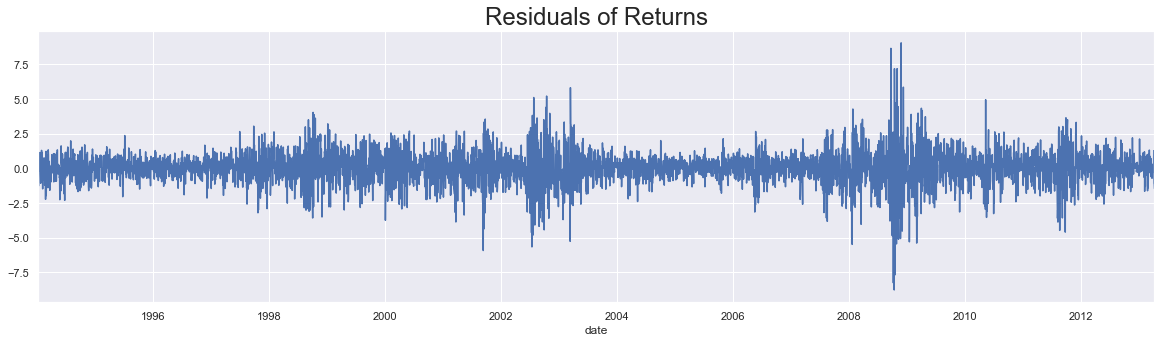

In [220]:
df.res_ret_ma_8[1:].plot(figsize = (20,5))
plt.title("Residuals of Returns", size = 24)
plt.show()

In [222]:
adfuller_test(df.res_ret_ma_8[2:])

parameter,value
Test statistic,-70.8418012995874600
P-value,0.0000000000000000
No.of lags used in the regression,0.0000000000000000
total noof observation,5017.0000000000000000
1% critical value,-3.4316540958700460
5% critical value,-2.8621162697870046
Maximum likelihood,15681.8541193627600000


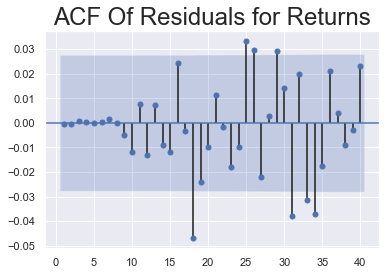

In [223]:
sgt.plot_acf(df.res_ret_ma_8[2:], zero = False, lags = 40)
plt.title("ACF Of Residuals for Returns",size=24)
plt.show()

In [ ]:
s